Il compito di questo progetto è realizzare un modello di Machine Learning in grado di prevedere se un messaggio è SPAM o Ham(“E-mail that is generally desired and isn't considered spam.”).<br> Il set di dati per questo caso di studio può essere trovato su Kaggle.<br>
I dati Consistono in 5574 messaggi di testo in inglese.<br>

Di seguito la struttura del Notebook:<br>
-Analisi dei dati e  pulizia<br>
-Visualizzazioni<br>
-Modellazione Algoritmo<br>
-Conclusione<br>

<br/><br/>

In [75]:
# this is a comment, I will explain the code below here

In [76]:
import pandas as pd
# import pandas library to have the operational features

df=pd.read_csv("C:/Users/Alessandro/Desktop/spam.csv", encoding="latin-1")
# open the file in Desktop named spam.csv, encoding some unreadable characters

df.head(2)
# df is diminutive of DataFrame, with this I ask to see the first 2 row

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


<br/><br/>

## Data Analysis and Cleaning

In [77]:
df.rename({"v1":"Category", "v2":"Message"}, axis=1, inplace=True)
#rename columns 
df.head(2)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [78]:
df.shape
#Print the shape (Get the number of rows and cols)

(5571, 2)

In [79]:
df.drop_duplicates(inplace = True)
#Checking for duplicates and removing them

In [80]:
df.shape

(5168, 2)

In [81]:
'''
Object_Message = df["Message"]
count=0
for item in Object_Message.isnull():
    if item=="True":
        count +=1
        print(count)
'''

# another method to see null values 

'\nObject_Message = df["Message"]\ncount=0\nfor item in Object_Message.isnull():\n    if item=="True":\n        count +=1\n        print(count)\n'

<br/><br/>

## Visualization

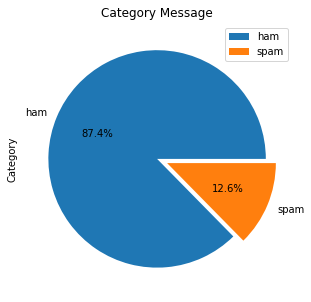

In [82]:
import matplotlib.pyplot as plt
%matplotlib inline
df["Category"].value_counts().plot(kind="pie", figsize=(5, 5), explode=[0,0.1], autopct = '%1.1f%%' )

# the library Matplotlib is used for visualization, let's see with pie chart how % of Spam and Ham in df 
# use value_counts().plot for plot the number in Category column
# autopct = '%1.1f%%'  show the percentage

plt.legend(["ham","spam"])
plt.title("Category Message")
plt.show()

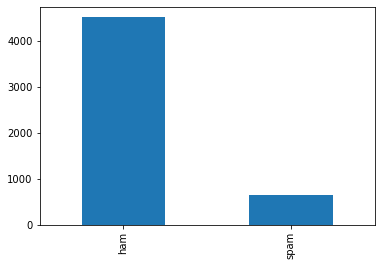

In [83]:
df["Category"].value_counts().plot(kind="bar")

# Number of message divided by category spam 653 and ham 4516

In [131]:
df['length'] = df['Message'].apply(len)
df.head(3)

# create new column with length of text for each message
# the length of the text is one of the main factors to validate whether an email is spam or ham

,Category,Message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155


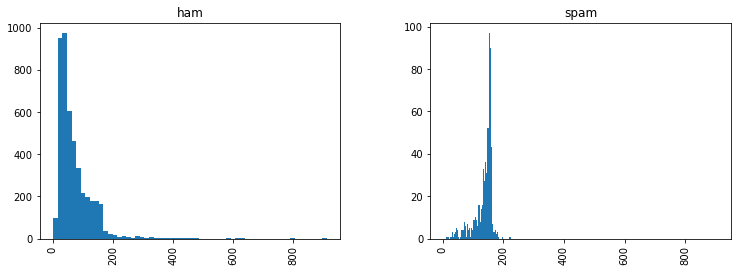

In [85]:
df.hist(column='length',by='Category',bins=60,figsize=(12,4));
plt.xlim(-40,950);

# Looks like spam messages are generally longer than ham messages:
# Bulk of ham has length below 100, for spam it is above 100.

<br/><br/>

## Machine Learning Models 

Nei modelli di machine learning è prassi comune convertire le variabili categoriche, ad esempio testo, nella loro rappresentazione numerica. <br>
Convertiamo con CountVectorizer il testo di ogni messaggio in una rappresentazione numerica

In [99]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
z= vectorizer.fit_transform(df["Message"])
#uso i metodi fit() e transform() per vettorizzare e trasformare il vettore. 
#Assegno il risultato alla variabile 

In [1]:
#vectorizer.get_feature_names()

In [101]:
from sklearn.model_selection import train_test_split

# split into 80% training and 20% testing
X_train,X_test,y_train,y_test = train_test_split(z,df["Category"], test_size = 0.2, random_state = 10)


Create and train the Naive Bayes Classifier: <br>
Usiamo un algoritmo in grado di risolvere problemi di classificazione e calcolare la probabilità di una causa che ha causato un evento. Per esempio si può calcolare la probabilità che una mail sia spam o ham

In [103]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train,y_train)

MultinomialNB()

In [116]:
#Print the predictions
print(classifier.predict(X_train))
print(y_train.values)

['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']
['ham' 'spam' 'spam' ... 'ham' 'ham' 'ham']


In [107]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, prediction)

0.9929850024189647

Il modello risponde correttamente nel 99% dei casi

<br/><br/>

#### Dove sbaglia il modello?

In [114]:
from sklearn.metrics import classification_report
prediction = classifier.predict(X_train)
print (classification_report(y_train, prediction))

              precision    recall  f1-score   support

         ham       0.99      1.00      1.00      3618
        spam       0.98      0.96      0.97       516

    accuracy                           0.99      4134
   macro avg       0.99      0.98      0.98      4134
weighted avg       0.99      0.99      0.99      4134



-La precisione della classe ham è 99. Vuol dire che il modello ha classificato correttamente la classe ham al 99%. <br> -La precisione della classe spam è invece 98. Pertanto, il modello sbaglia a classificato leggermente di più  gli esempi della classe spam. 

Per saperne di più sugli errori del modello posso utilizzare anche la matrice di confusione (confusion matrix).

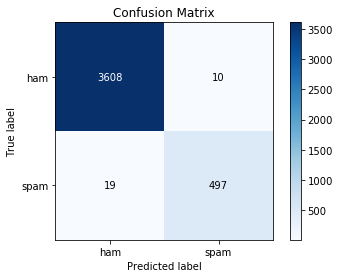

In [121]:
import scikitplot as skplt
import matplotlib.pyplot as plt
skplt.metrics.plot_confusion_matrix(y_train, prediction)

 <img src="confusion_matrix.png" width="40%" >

### Conclusione

-Il mdello ha risposto correttamente 3608 volte per la classe ham ( True Positive). <br>
-10 email di spam sono ritenute valide (False Negative).  <br>
-19 volte il modello ha sbagliato nel predirre la classe (False Positive) ritenendo erroneamente si trattatasse di spam. <br> 
-prevedenedo invece bene 497 messaggi di spam(True Negative).  


In [127]:
#La precisione del modello è data dal:
#numero delle previsioni corrette sul totale delle previsioni positive del modello (sia corrette che sbagliate) 
3608/(3608+19)  

0.9947615108905431